In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_iris()

In [4]:
X = data.data
Y = data.target

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(X)
df.head()
df.columns = data.feature_names   ## Since the columns in the Data Frame were not exactly the ones present as the features of iris_dataset..we have overridden the Column names of the DataFrame with the actual names of the features.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'length')

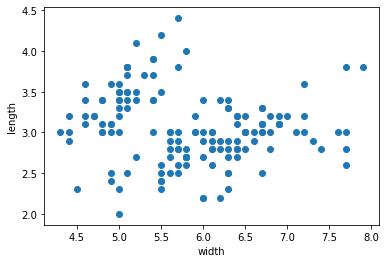

In [8]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('width')
plt.ylabel('length')

Text(0, 0.5, 'length')

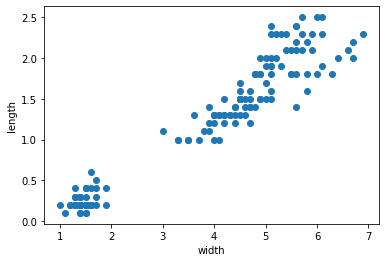

In [9]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('width')
plt.ylabel('length')


### We will apply the k-means for Sepal length and width first

In [10]:
df_sepal = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 1)

In [11]:
df_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
from sklearn.cluster import KMeans

In [13]:
sse = {}
for k in range(1,10):
    k_means = KMeans(n_clusters = k)
    k_means.fit(df_sepal[['sepal length (cm)']], df_sepal[['sepal width (cm)']])
    sse[k] = k_means.inertia_
    

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [14]:
sse

{1: 102.16833333333334,
 2: 30.914493796079853,
 3: 15.816622672964716,
 4: 8.257769230769233,
 5: 5.566930169403854,
 6: 3.718401544401545,
 7: 2.673320360467418,
 8: 1.9696103386809265,
 9: 1.5121694521508762}

#### Elbow Plot

[]

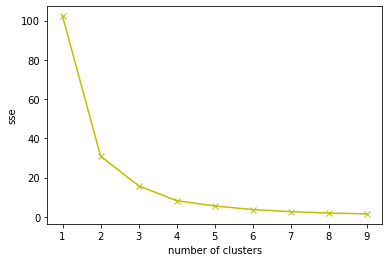

In [15]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'yx-')
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.plot()


In [16]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\saad\anaconda3\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [17]:
k_means = KMeans(n_clusters = 2, random_state = 1)
k_means.fit(df_sepal)

k_means.labels_

df_sepal['cluster_label'] = k_means.predict(df_sepal)

df_sepal.tail()


,sepal length (cm),sepal width (cm),cluster_label
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0
149,5.9,3.0,1


In [18]:
k_means.cluster_centers_

array([[6.61044776, 2.96567164],
       [5.22409639, 3.1313253 ]])

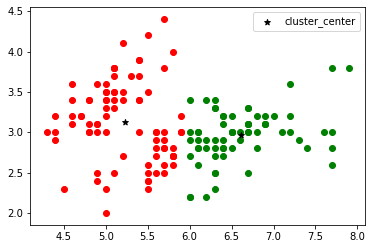

In [19]:
df1_sepal = df_sepal[df_sepal['cluster_label'] == 0]
df2_sepal = df_sepal[df_sepal['cluster_label'] == 1]

plt.scatter(df1_sepal['sepal length (cm)'], df1_sepal['sepal width (cm)'], color = 'green')
plt.scatter(df2_sepal['sepal length (cm)'], df2_sepal['sepal width (cm)'], color = 'red')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = 'black', marker = '*', label = 'cluster_center')
plt.legend()

### Now We will apply K-Means for Petal length and width

In [20]:
df_petal = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
df_petal.head()
df_petal.shape

(150, 2)

In [21]:
sse = {}

for k in range(1,9):
    k_means = KMeans(n_clusters = k)
    k_means.fit(df_petal[['petal length (cm)']], df_petal[['petal width (cm)']])
    sse[k] = k_means.inertia_

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [22]:
sse

{1: 464.3254,
 2: 67.60373143196672,
 3: 24.862898039215686,
 4: 12.577511111111109,
 5: 8.772643291592125,
 6: 5.910400574712643,
 7: 4.244064116318463,
 8: 3.4177973741944316}

[]

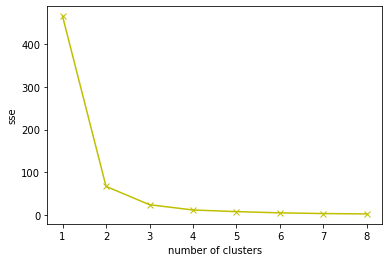

In [23]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'yx-')
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.plot()

In [24]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\saad\anaconda3\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
k_means = kMeans(n_clusters = 2, random_state = 1)
k_means.fit(df_petal[['petal length (cm)']], df_petal[['petal width (cm)']])

df_petal['cluster_label'] = k_means.predict(df_petal)

In [ ]:
k_means.labels_

In [ ]:
k_means.cluster_centers_

In [ ]:
df1 = df_petal[df_petal['cluster_label'] == 0]
df2 = df_petal[df_petal['cluster_label'] == 1]

plt.scatter(df1['petal length (cm)'], df1['petal width'], c = 'blue')
plt.scatter(df2['petal length (cm)'], df2['petal width'], c = 'green')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_[:,1], marker = '*', c = 'black',
           label = 'cluster center')
plt.legend()